In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df = pd.read_csv('/content/drive/MyDrive/AIML_IITG/Datasets/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [10]:
df = df.drop(columns = "Unnamed: 0")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


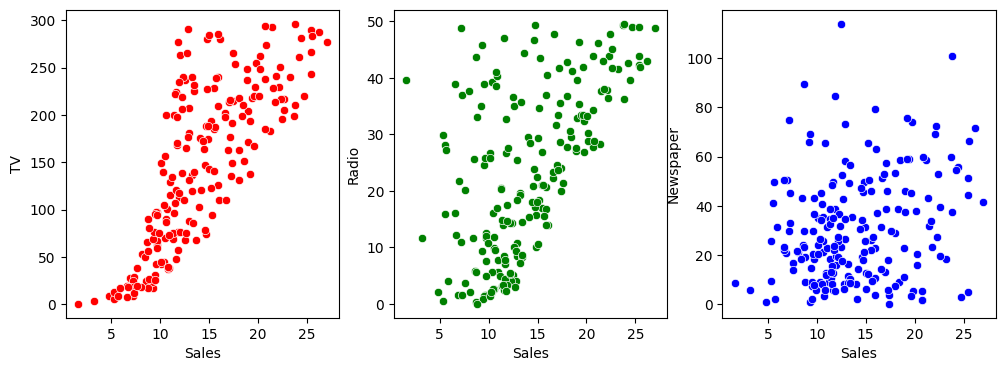

In [10]:
fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(12,4))
sns.scatterplot(y = "TV",x = 'Sales',data=df,color="red",ax=ax[0])
sns.scatterplot(y = "Radio",x = 'Sales',data=df,color="green",ax=ax[1])
sns.scatterplot(y= "Newspaper",x = 'Sales',data=df,color="blue",ax=ax[2])
plt.show()

In [11]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [12]:
from sklearn.linear_model import LinearRegression
#model = LinearRegression()
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop(columns="Sales",axis=1)
y = df["Sales"]

In [14]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [15]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=101,test_size=0.3)

In [16]:
x_train

,TV,Radio,Newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [17]:
model = LinearRegression()
model.fit(x_train,y_train)
model

LinearRegression()

In [18]:
y_pred = model.predict(x_test)

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [20]:
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [21]:
MSE

2.2987166978863796

In [22]:
MAE

1.213745773614481

In [23]:
RMSE

np.float64(1.5161519375993884)

In [16]:
my_pred = model.predict([[154.3,87.5,76]])
my_pred

NameError: name 'model' is not defined

In [25]:
model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [26]:
model.intercept_

np.float64(3.1515267680706547)

In [27]:
from joblib import dump
dump(model,"/content/drive/MyDrive/AIML_IITG/Linear_Regression/linear_model.joblib")

['/content/drive/MyDrive/AIML_IITG/Linear_Regression/linear_model.joblib']

In [17]:
from sklearn.preprocessing import PolynomialFeatures

In [18]:
train_mse = []
test_mse = []

for d in range(1,11):
  poly = PolynomialFeatures(degree=d,include_bias=False)
  X_poly = poly.fit_transform(X)
  x_train,x_test,y_train,y_test = train_test_split(X_poly,y,random_state=50,test_size=0.3)
  model = LinearRegression()
  model.fit(x_train,y_train)
  train_pred = model.predict(x_train)
  test_pred = model.predict(x_test)
  train_er = mean_squared_error(y_train,train_pred)
  test_er = mean_squared_error(y_test,test_pred)
  train_mse.append(train_er)
  test_mse.append(test_er)


In [19]:
train_mse

[2.9332417170790435,
 0.42785903293606914,
 0.2466552347360684,
 0.13452050864569454,
 0.06194264085176806,
 0.0693233715062435,
 0.10113196187302838,
 0.14687098910734236,
 0.30823439238183437,
 0.46398660574036865]

In [21]:
test_mse

[2.622772900751399,
 0.2417536593718446,
 0.2592240426611268,
 0.9095226340940866,
 7.865045495926839,
 883.0201610155257,
 43446.94756751678,
 17168646.60168482,
 2004049668.1881673,
 701090231.2623427]

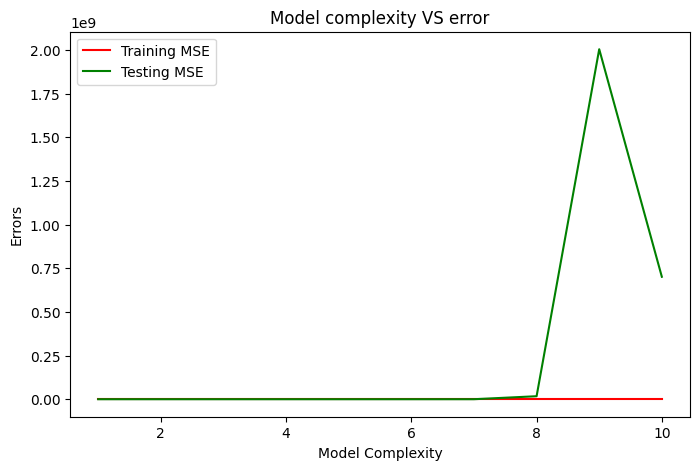

In [23]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11),train_mse,label = "Training MSE",color="red")
plt.plot(range(1,11),test_mse,label = "Testing MSE",color="green")
plt.xlabel("Model Complexity")
plt.ylabel("Errors")
plt.title("Model complexity VS error")
plt.legend()
plt.show()

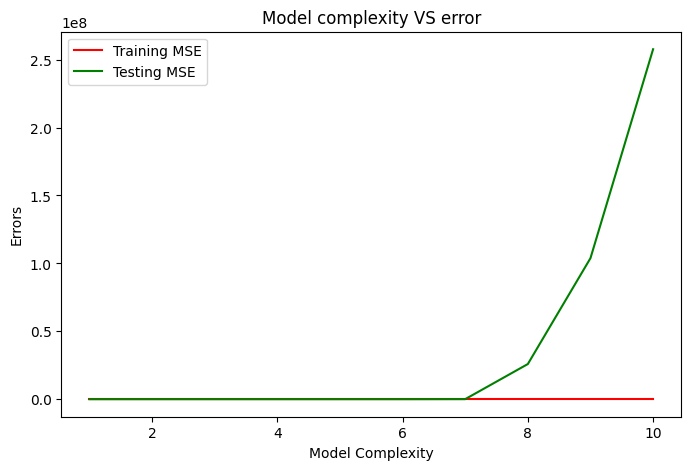

In [24]:
train_mse = []
test_mse = []

for d in range(1,11):
  poly = PolynomialFeatures(degree=d,include_bias=False)
  X_poly = poly.fit_transform(X)
  x_train,x_test,y_train,y_test = train_test_split(X_poly,y,random_state=42,test_size=0.3)
  model = LinearRegression()
  model.fit(x_train,y_train)
  train_pred = model.predict(x_train)
  test_pred = model.predict(x_test)
  train_er = mean_squared_error(y_train,train_pred)
  test_er = mean_squared_error(y_test,test_pred)
  train_mse.append(train_er)
  test_mse.append(test_er)

plt.figure(figsize=(8,5))
plt.plot(range(1,11),train_mse,label = "Training MSE",color="red")
plt.plot(range(1,11),test_mse,label = "Testing MSE",color="green")
plt.xlabel("Model Complexity")
plt.ylabel("Errors")
plt.title("Model complexity VS error")
plt.legend()
plt.show()

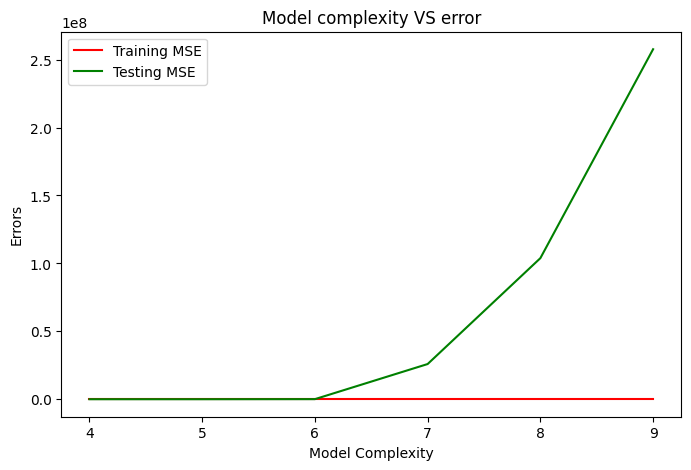

In [25]:
plt.figure(figsize=(8,5))
plt.plot(range(4,10),train_mse[4:10],label = "Training MSE",color="red")
plt.plot(range(4,10),test_mse[4:10],label = "Testing MSE",color="green")
plt.xlabel("Model Complexity")
plt.ylabel("Errors")
plt.title("Model complexity VS error")
plt.legend()
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)
poly_features = PolynomialFeatures(degree=3,include_bias=False)
x_poly_train= poly_features.fit_transform(x_train_sc)
x_poly_test = poly_features.transform(x_test_sc)
poly_model = LinearRegression()
poly_model.fit(x_poly_train,y_train)
poly_pred = poly_model.predict(x_poly_test)


In [41]:
poly_mse = mean_squared_error(y_test,poly_pred)
poly_mae = mean_absolute_error(y_test,poly_pred)
poly_rmse = np.sqrt(poly_mse)

In [42]:
poly_mse

0.2907744915245594

In [43]:
poly_mae

0.3972831213298214

In [44]:
poly_rmse

np.float64(0.539235098565143)

In [45]:
poly_model.coef_

array([ 2.78878017e+00,  3.07663942e+00, -1.48943975e-02, -6.03872228e-01,
        1.27276715e+00, -1.00578368e-01,  1.26544423e-02, -3.95547511e-02,
       -2.04469521e-02,  4.33264192e-01, -9.18496990e-02,  1.60743155e-01,
       -2.46342694e-03, -7.53114660e-02,  1.79756951e-03, -1.09280254e-02,
        1.58621980e-02, -1.04097264e-02, -1.30624120e-02])

In [46]:
poly_model.intercept_

np.float64(15.143761824772252)